Following the description in:
    
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Paper:

https://arxiv.org/ftp/arxiv/papers/1604/1604.02878.pdf

Paper Author homepage:

https://kpzhang93.github.io/MTCNN_face_detection_alignment/

In [3]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

ModuleNotFoundError: No module named 'tensorflow'

The minimum box size for detecting a face can be specified via the ‘min_face_size‘ argument, which defaults to 20 pixels. The constructor also provides a ‘scale_factor‘ argument to specify the scale factor for the input image, which defaults to 0.709.

In [21]:
# load image from file
#filename = '../Bilder/african-presidents.jpg'
#filename = '../Bilder/HochschuleFurtwangen.JPG'

filename = '../Bilder/mannschaft.jpg'#png mag er nicht, da die Werte im Bereich 0-1 liegen
my_min_face_size=20#original param
my_scale_factor= 0.709#original param
#my_min_face_size=10# best param for Hochschule Furtwangen
#my_scale_factor= 0.79#best param for Hochschule Furtwangen
#my_min_face_size=10# best param for mannschaft
#my_scale_factor= 0.39#best param for mannschaf

In [22]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

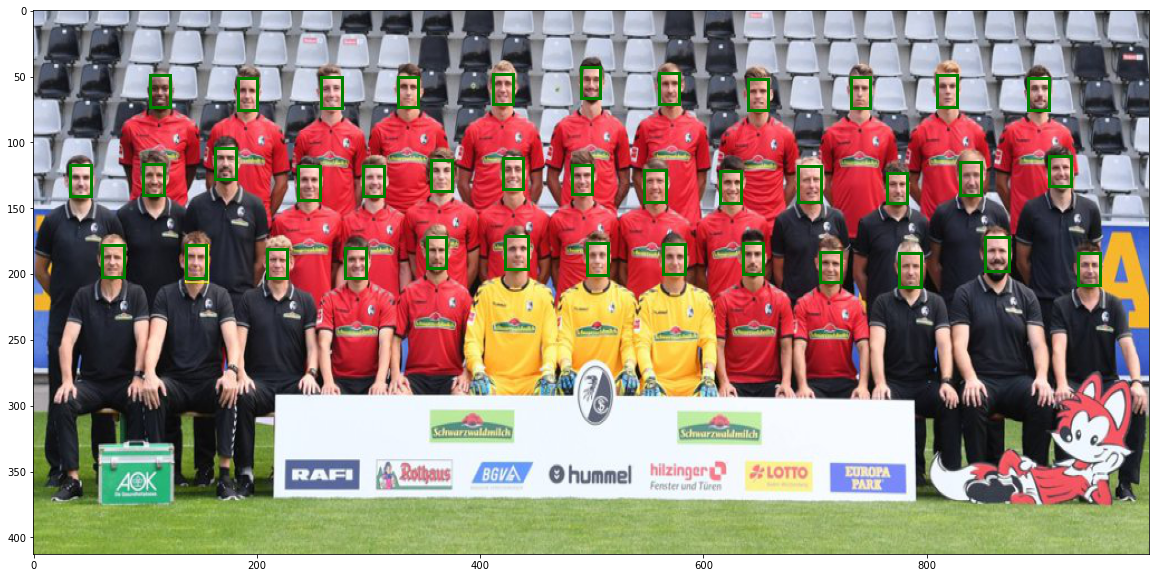

In [23]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.figure(figsize = (20,10))
    pyplot.imshow(data, aspect='auto')
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='green', lw = 3)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()
    #pyplot.savefig('detected_mannschaft.png',dpi=300)
 
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN(min_face_size=my_min_face_size, scale_factor= my_scale_factor, steps_threshold = [0.6,0.7,0.7])
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [5]:
faces

[{'box': [423, 170, 21, 26],
  'confidence': 0.999998927116394,
  'keypoints': {'left_eye': (429, 181),
   'right_eye': (439, 181),
   'nose': (435, 186),
   'mouth_left': (430, 190),
   'mouth_right': (438, 191)}},
 {'box': [210, 179, 17, 23],
  'confidence': 0.9999979734420776,
  'keypoints': {'left_eye': (215, 189),
   'right_eye': (223, 189),
   'nose': (219, 194),
   'mouth_left': (214, 198),
   'mouth_right': (223, 198)}},
 {'box': [482, 117, 18, 22],
  'confidence': 0.9999978542327881,
  'keypoints': {'left_eye': (487, 126),
   'right_eye': (496, 125),
   'nose': (492, 131),
   'mouth_left': (488, 134),
   'mouth_right': (496, 134)}},
 {'box': [910, 111, 18, 22],
  'confidence': 0.9999912977218628,
  'keypoints': {'left_eye': (916, 120),
   'right_eye': (925, 119),
   'nose': (922, 124),
   'mouth_left': (917, 128),
   'mouth_right': (926, 128)}},
 {'box': [764, 123, 18, 23],
  'confidence': 0.9999902248382568,
  'keypoints': {'left_eye': (770, 132),
   'right_eye': (779, 132),


In [6]:
pixels.shape

(413, 1000, 3)

In [7]:
faces = detector.detect_faces(255*pixels[:,:500,:])
print(faces)

[]


In [8]:
faces

[]

In [9]:
type(pixels)

numpy.ndarray

In [10]:
import numpy as np
np.max(pixels)

255